In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
df = pd.read_csv('final.csv')
df.sample(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
2418,19,1.447,56.4,26.94,No,No_delivary,120,75,Normal,Normal,No,No,No,0,1
13,26,1.524,72.0,31.00,No,Normal,120,70,Normal,Normal,No,No,No,2,3
1689,16,1.499,59.0,26.27,No,No_delivary,90,70,Normal,Low,No,No,Yes,0,1
1313,19,1.422,48.0,23.74,No,Normal,110,80,Normal,Normal,No,No,No,2,4
1600,36,1.447,67.0,32.00,No,Normal,100,70,Normal,Normal,No,No,No,1,2


In [2]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure(figsize=(12,8))
# sn.histplot(df.Age[df.Risk == 'Yes'])
# sn.histplot(df.Age[df.Risk == 'No'],color='red')
# plt.show()

In [3]:
# df['Blood Group ( is Negative?)'] = df['Blood Group ( is Negative?)'].map({'Yes':1,'No':0})
# df['Jaundice'] = df['Jaundice'].map({'Yes':1,'No':0})
# df['Diabetes'] = df['Diabetes'].map({'Yes':1,'No':0})
# df['Risk'] = df['Risk'].map({'Yes':1,'No':0})
# df['Delivery Type'] = df['Delivery Type'].map({'No_delivary':0,'Normal':1,'C-section':2})
# df['Edema'] = df['Edema'].map({'Normal':0,'High':1,'Modarate':2})
# df['Anemia'] = df['Anemia'].map({'Normal':0,'Low':1,'Very-Low':2})

In [4]:
df.sample(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
2020,31,1.549,71.0,29.58,No,No_delivary,130,90,Normal,Low,No,No,No,0,1
2181,28,1.524,54.0,23.25,No,Normal,120,70,Normal,Normal,No,No,No,1,2
2554,18,1.524,45.0,19.38,No,No_delivary,110,80,Normal,Normal,No,No,No,0,1
105,24,1.397,66.0,33.82,No,Normal,120,70,High,Very-Low,No,Yes,Yes,1,2
59,23,1.448,49.0,23.38,No,No_delivary,90,60,Normal,Normal,No,No,Yes,0,1


In [5]:
columns = df.columns[:]
columns

Index(['Age', 'Height', 'Weight', 'BMI', 'Blood Group ( is Negative?)',
       'Delivery Type', 'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Edema', 'Anemia', 'Jaundice', 'Diabetes', 'Risk', 'Para', 'Gravida'],
      dtype='object')

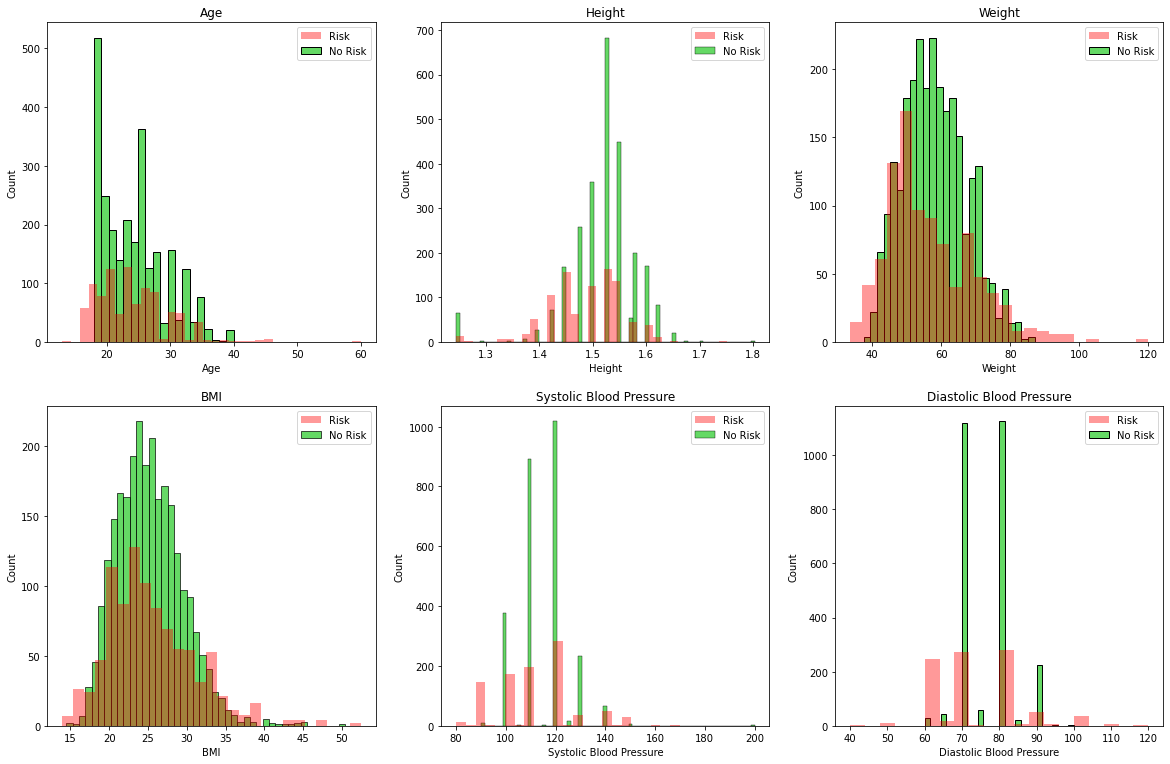

In [38]:
num_list=['Age', 'Height', 'Weight', 'BMI','Systolic Blood Pressure', 'Diastolic Blood Pressure']
fig = plt.figure(figsize=(20,20))

for i in range(len(num_list)):
    plt.subplot(3,3,i+1)
    plt.title(num_list[i])
    sn.histplot(df[df['Risk'] == 'No'][num_list[i]],kde=False,kde_kws={'multiple':'stack'},label='No Risk',color='limegreen',) 
    sn.distplot(df[df['Risk'] == 'Yes'][num_list[i]],kde=False,kde_kws={'multiple':'stack','alpha':0.6},label='Risk',color='red')
#     plt.savefig('./Figure/'+num_list[i]+' bar plot of yes no.jpg')
    plt.legend()

# plt.tight_layout()

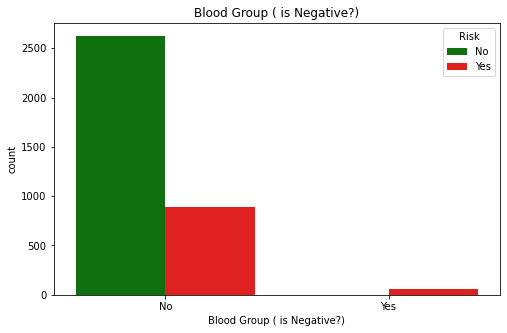

In [71]:
plt.figure(figsize=(8,5))
plt.title('Blood Group ( is Negative?)')
plt.xlabel(' ')
sn.countplot(data=df, x='Blood Group ( is Negative?)', hue="Risk",palette=['green','red'])
# plt.savefig('./Figure/Blood Group bar plot of yes no.jpg')
plt.show()

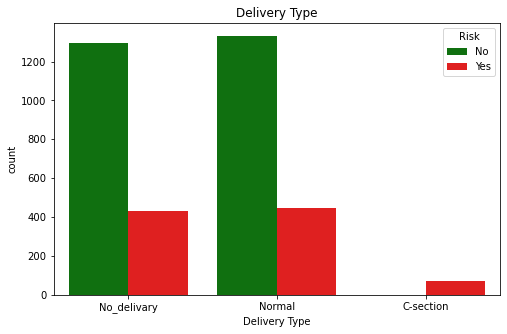

In [72]:
plt.figure(figsize=(8,5))
plt.title('Delivery Type')
sn.countplot(data=df, x='Delivery Type', hue="Risk",palette=['green','red'])
# plt.savefig('./Figure/Delivery Type bar plot of yes no.jpg')
plt.show()

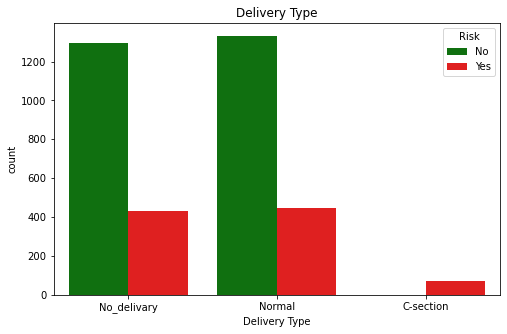

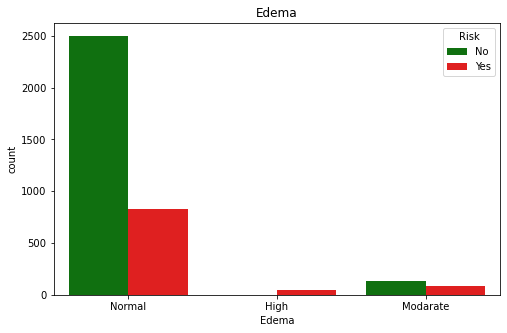

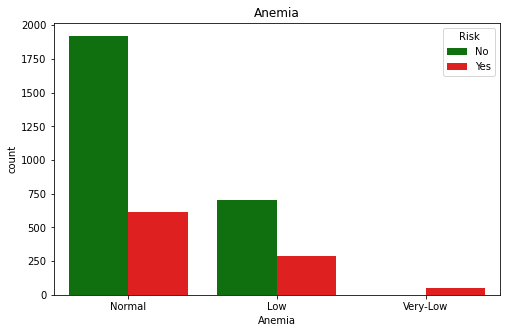

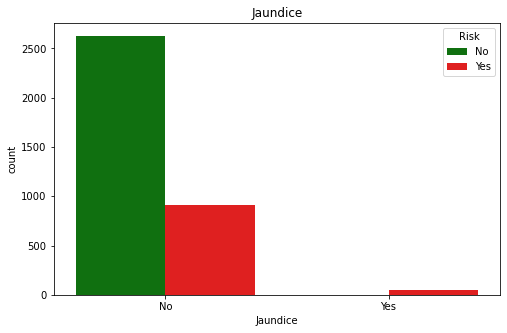

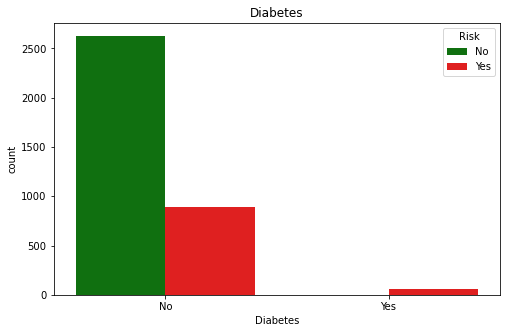

In [76]:
columns = ['Delivery Type','Edema', 'Anemia', 'Jaundice', 'Diabetes']
for col in columns:
    plt.figure(figsize=(8,5))
    plt.title(col)
    sn.countplot(data=df, x=col, hue="Risk",palette=['green','red'])
    plt.savefig('./Figure/'+col+' bar plot of yes no.jpg')
    plt.show()

In [80]:
newdf = df.drop(['Age', 'Height', 'Weight', 'BMI', 'Blood Group ( is Negative?)',
       'Delivery Type', 'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Edema', 'Anemia', 'Jaundice', 'Diabetes'],axis=1)

In [83]:
for i in range(len(newdf)):
    newdf.loc[i,'diff'] = newdf.loc[i,'Gravida'] - newdf.loc[i,'Para']
newdf['diff'] = newdf['diff'].astype(int)

In [84]:
newdf.head()

,Risk,Para,Gravida,diff
0,No,0,1,1
1,No,2,3,1
2,No,0,1,1
3,Yes,1,3,2
4,Yes,1,2,1


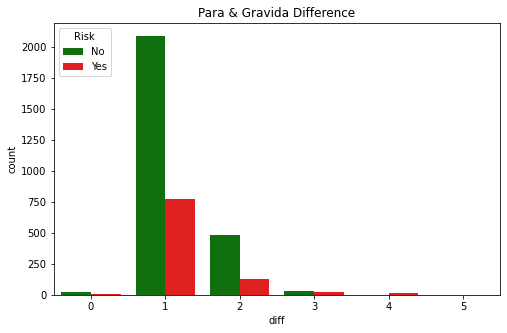

In [86]:
plt.figure(figsize=(8,5))
plt.title('Para & Gravida Difference')
sn.countplot(data=newdf, x='diff', hue="Risk",palette=['green','red'])
# plt.savefig('./Figure/Para & Gravida Difference bar plot of yes no.jpg')
plt.show()